## Contexto:

Se trata de una base de datos acerca de calidad de vinos.

El conjunto de datos tiene 13 variables independientes. La variable objetivo es una variable categórica ordinal que etiqueta a los vinos como buenos, regulares y malos. Se asume que el nombre de las clases está ofuscado para evitar potencial sesgo. 

Las 13 variables son continuas :

alcohol
Ácido málico
Cenizas
Alcalinidad de las cenizas
Magnesio
Fenoles totales
flavanoles
Fenoles no flavanoles
Proantocianinas
Intensidad del color
Tono
OD280_OD315 (absorbancia)
Prolina

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind

El conjunto de datos no posee nombres de columnas por lo que se crea una lista de nombres que le servirán al data frame en pandas.

In [41]:
wine_colnames=[
  'wine_class',
  'alcohol',
  'malic_acid',
  'ash',
  'ash_alcalinity',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoids_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'OD280_OD315',
  'proline',
  ]

wine_data = pd.read_csv('./data/wine.data', sep=',', names=wine_colnames)

In [42]:
wine_data.head()

,wine_class,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se puede observar que la primera columna pertenece a la variable objetivo, mientras que las demás variables son independientes y contínuas.

In [43]:
wine_data.shape

(178, 14)

Se posee un conjunto de datos con 178 observaciones y 13 características más la variable objetivo. 

In [44]:
wine_data.describe()

,wine_class,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Se observa que ninguno de los datos numéricos presenta sobre dispersión. Los cambios entre los valores máximos en cada cuartil indican que probablemente las variables podrían tener poca o nula normalidad.

In [45]:
wine_data.wine_class.value_counts()

2    71
1    59
3    48
Name: wine_class, dtype: int64

Mientras que la variable objetivo está desbalanceada. La clase 2 está sobre representada y la clase 3 está sub representada. Esto podría abordarse más adelante con un submuestro y una técnica SMOTE

Se separarán los datos en variables indepentiendes y variable dependiente.

In [46]:
x_wine = wine_data.iloc[:, 1:]
y_wine = wine_data.wine_class

In [47]:
x_wine.head()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
y_wine

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: wine_class, Length: 178, dtype: int64

Después se obtiene una tabla de correlaciones ya que la correlación entre variables independientes puede afectar varios análisis posteriores, además la correlación en sí puede dar información interesante acerca del comportamiento de las variables.

In [49]:
x_wine.corr()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
ash_alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoids_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Para una lectura más precisa y más rápida de la tabla se implementará un mapa de calor para saber dónde se concentran las correlaciones más fuertes.

<AxesSubplot:>

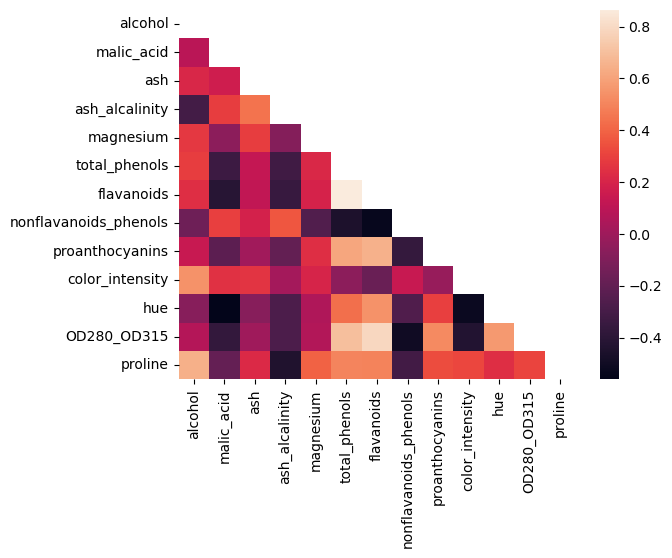

In [50]:
x_wine_corr = x_wine.corr()
sns.heatmap(x_wine_corr, mask=np.triu(np.ones_like(x_wine_corr, dtype=bool)))

Se observa que las correlaciones positivas más fuertes están por encima de 0.6 y las negativas más fuertes están por debajo de -0.4. Se obtendrán las correlaciones que están por fuera de ese rango.

In [51]:
#Experimento
#high_correlations = x_wine_corr.where(abs(x_wine_corr) > 0.4)

In [52]:
high_correlations = x_wine_corr.where(np.logical_or(x_wine_corr < -0.4, x_wine_corr > 0.6))

In [53]:
high_correlations

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
alcohol,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643720
malic_acid,NaN,1.000000,NaN,NaN,NaN,NaN,-0.411007,NaN,NaN,NaN,-0.561296,NaN,NaN
ash,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ash_alcalinity,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.440597
magnesium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_phenols,NaN,NaN,NaN,NaN,NaN,1.000000,0.864564,-0.449935,0.612413,NaN,NaN,0.699949,NaN
flavanoids,NaN,-0.411007,NaN,NaN,NaN,0.864564,1.000000,-0.537900,0.652692,NaN,NaN,0.787194,NaN
nonflavanoids_phenols,NaN,NaN,NaN,NaN,NaN,-0.449935,-0.537900,1.000000,NaN,NaN,NaN,-0.503270,NaN
proanthocyanins,NaN,NaN,NaN,NaN,NaN,0.612413,0.652692,NaN,1.000000,NaN,NaN,NaN,NaN
color_intensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.521813,-0.428815,NaN


Con un mapa de calor podremos ver mejor qué variables están más correlacionadas.

<AxesSubplot:>

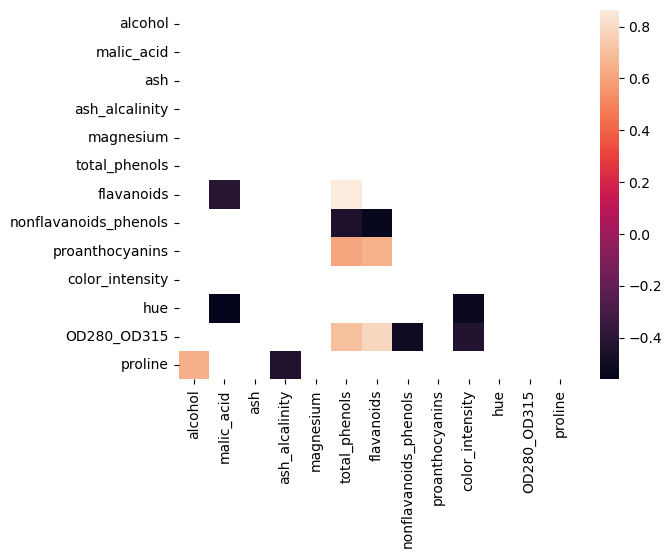

In [54]:
sns.heatmap(high_correlations, mask=np.triu(np.ones_like(high_correlations, dtype=bool)))

La absorbancia parece estar más correlacionada con algunas variables, como los fenoles, los flavanoles, el color, etc.
La variable se refiere a la razón de absorbancia medida a dos longitudes de onda específicas: 280 nm y 315 nm.

La absorbancia a 280 nm (longitud de onda) se utiliza para medir la concentración de proteínas y ácidos nucleicos en una muestra.
mientras que la absorbancia a 315 nm se utiliza para medir la concentración de compuestos fenólicos, como taninos y antocianinas, que son responsables del color y sabor del vino.

Tiene sentido que sea una variable muy correlacionada, pero llama la atención aún más que la intensidad de color esté negativamente correlacionada con el valor de la absorbancia.

¿Podrían estas dos variables explicar mejor la diferencia entre clases?

Se crearán gráficos de correlación para confirmar que las variables en efecto se correlacionan, y además se observará si hay tendencias de normalidad en las variables. 

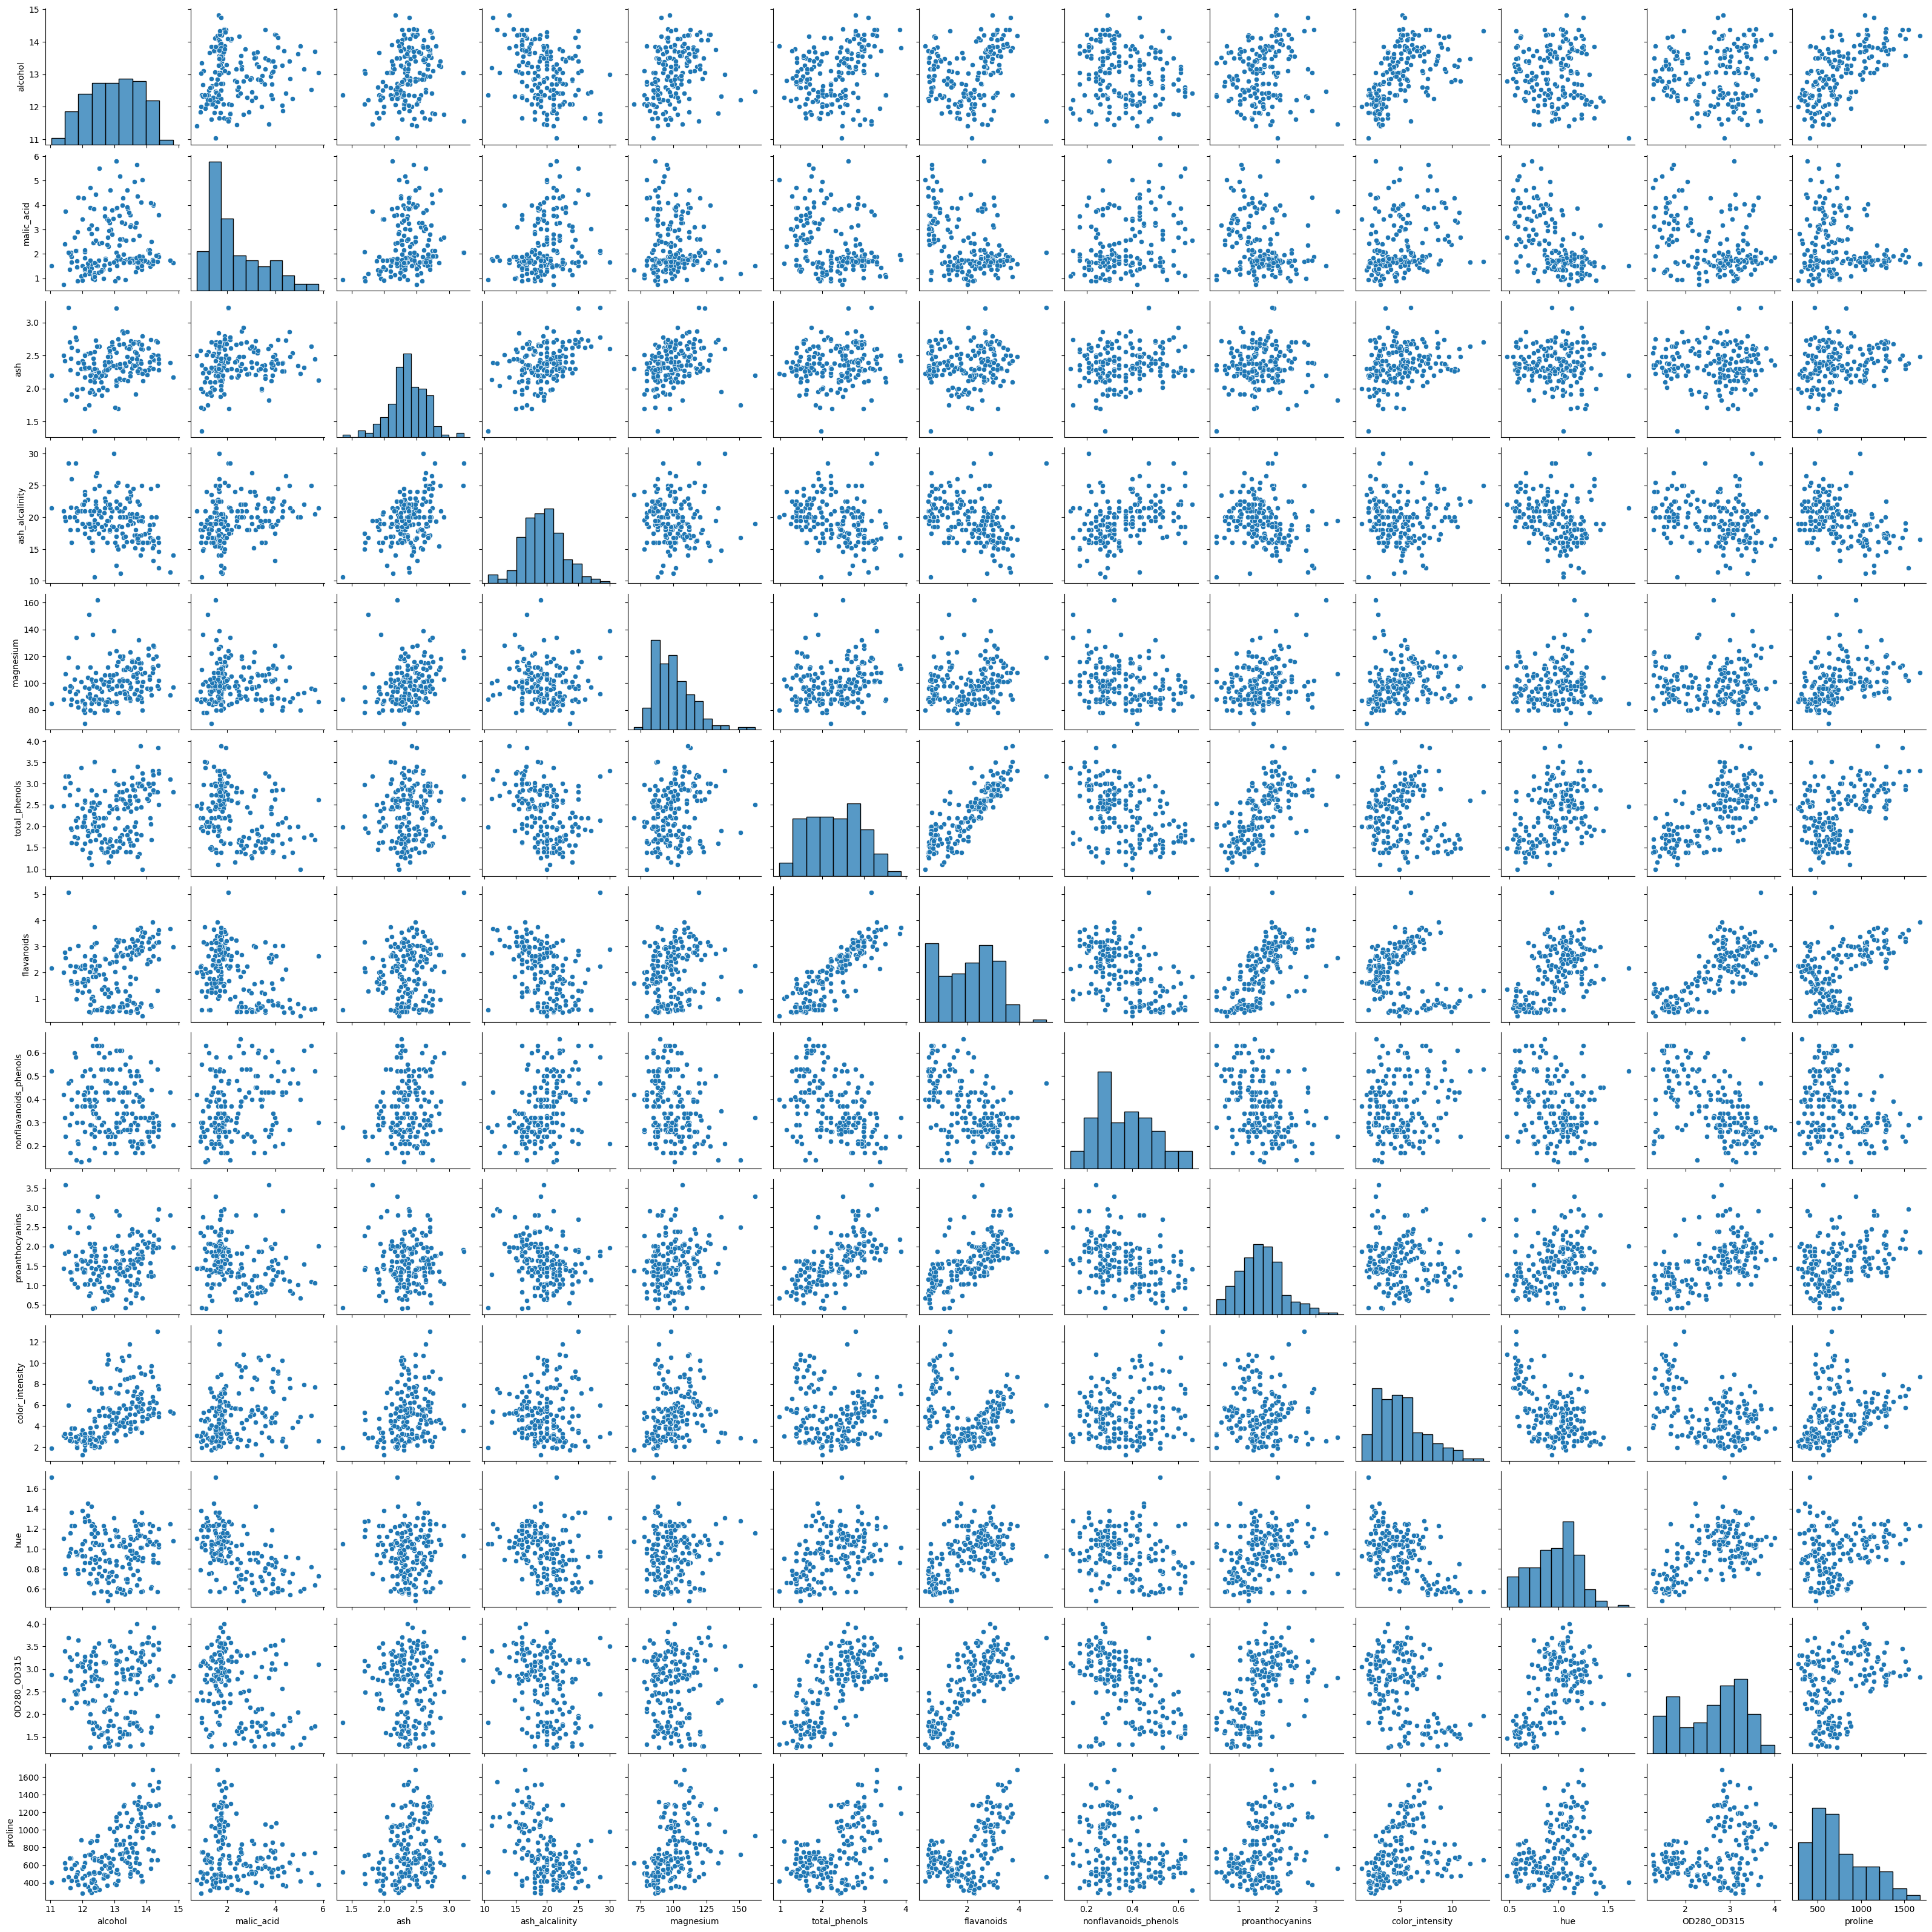

In [55]:
sns.pairplot(x_wine)

Sin embargo el diagrama de dispersión muestra que el color y la absorbacia no presentan realmente una correlación, a diferencia de los flavanoles y los fenoles, que claramente muestran una tendencia positiva. A continuación se muestran histogramas para evaluar la posible normalidad en las variables.

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'ash_alcalinity'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoids_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'OD280_OD315'}>],
       [<AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

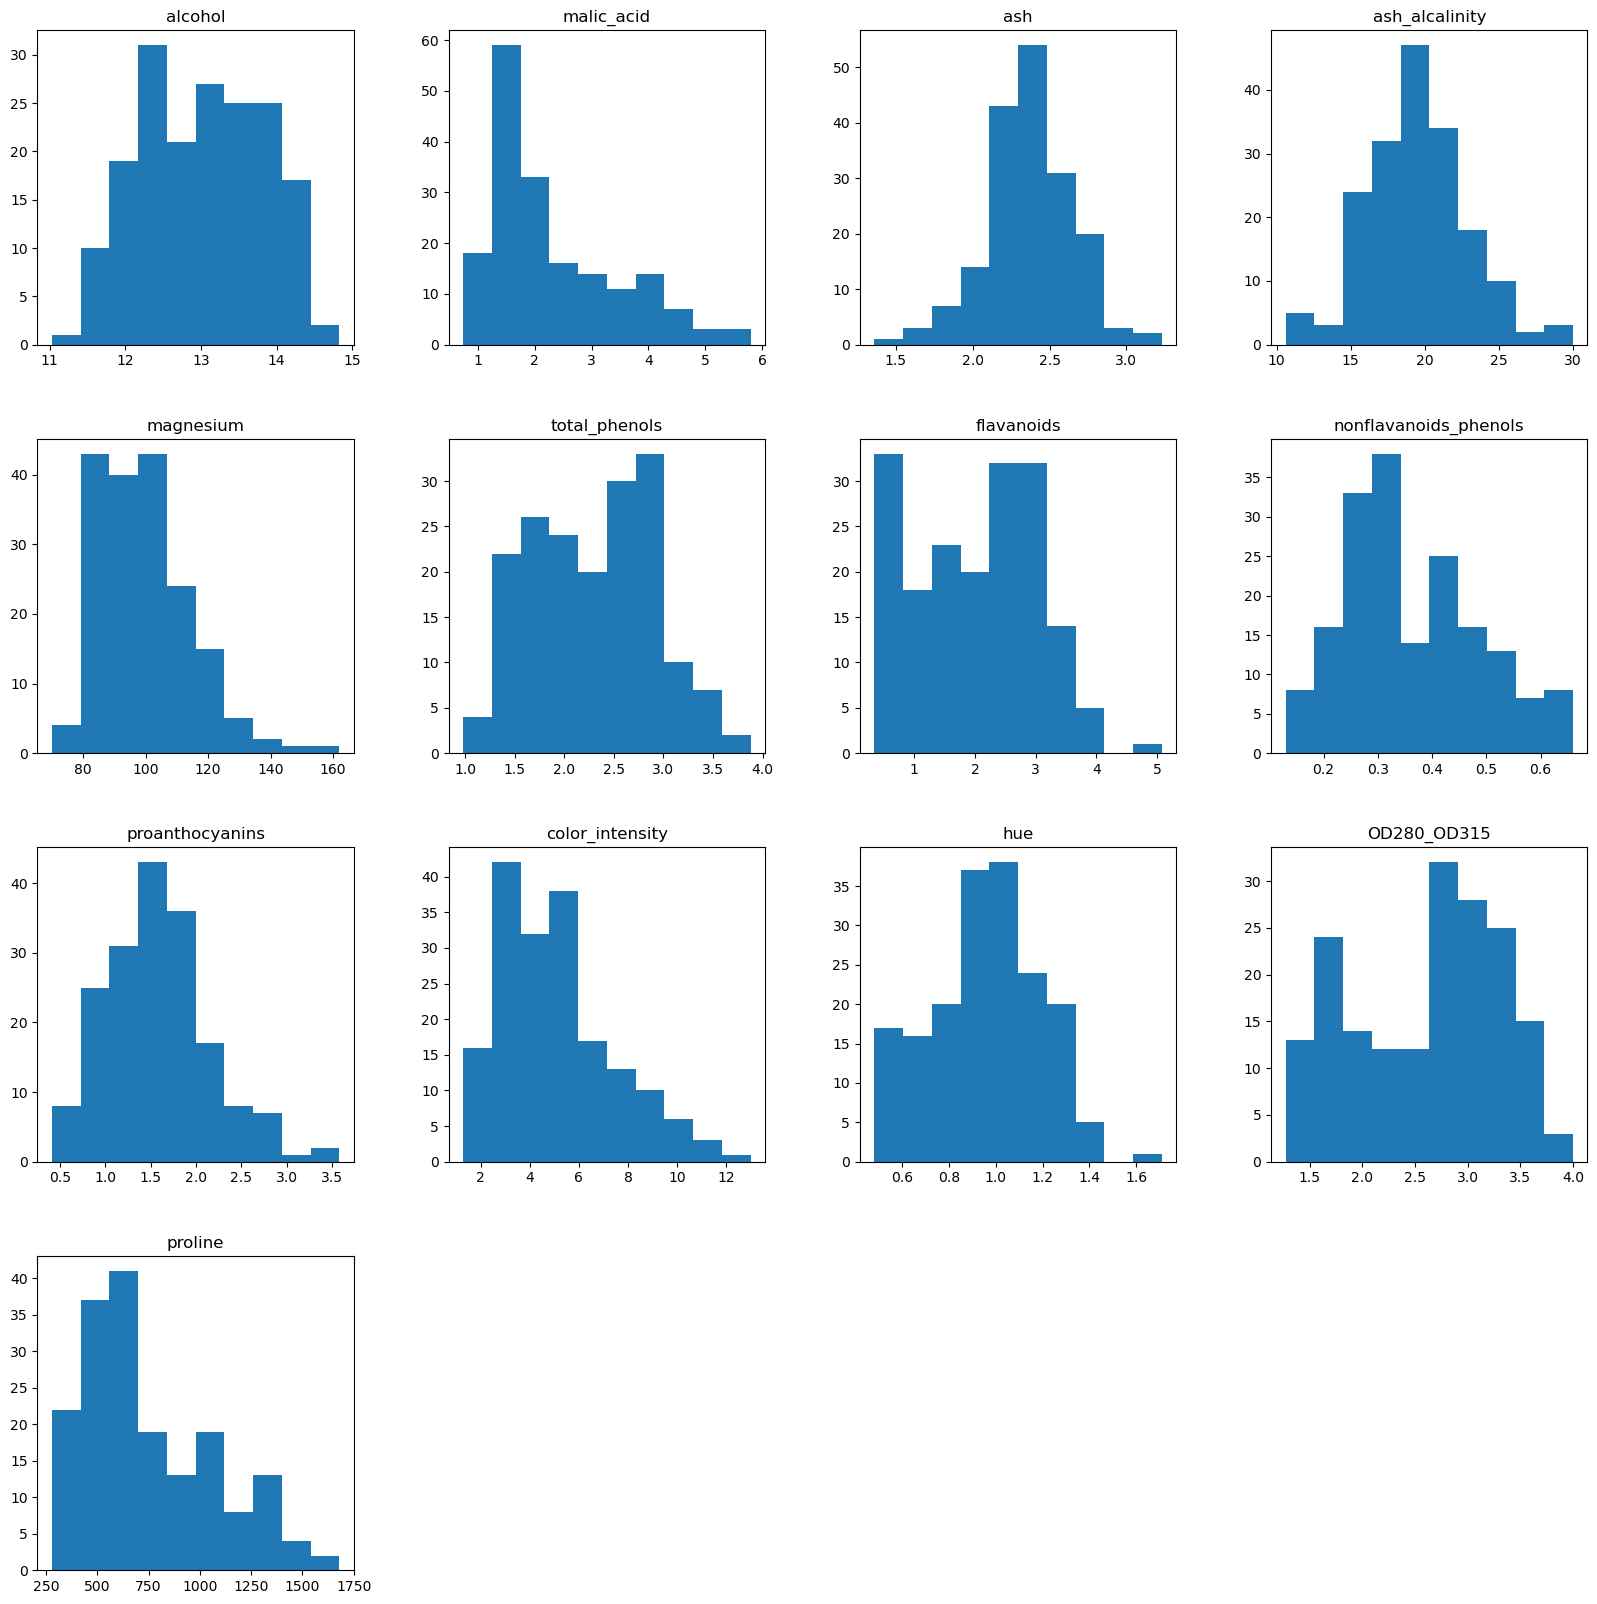

In [56]:
x_wine.hist(figsize=(20, 20), grid=False)

Las cenizas y su alcalinidad parecen semejantes a una distribución normal, lo que hace que sean buenas candidatas para posteriores procesos. Las variables de color y proantocianinas parecen estar sesgadas a la izquierda, lo cual ya sugiere la siguiente acción para ajustarlas a una distribución normal.

Se evaluarán los datos para observar los valores fuera de rango en cada variable usando un diagrama de caja. Los datos serán normalizados (se resta la media y se divide entre la desviación estándar) para fines prácticos.

<AxesSubplot:>

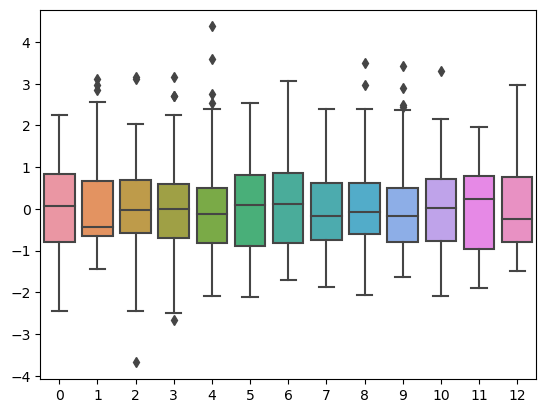

In [57]:
scaler = preprocessing.StandardScaler()
sns.boxplot(data=scaler.fit_transform(x_wine))

<AxesSubplot:>

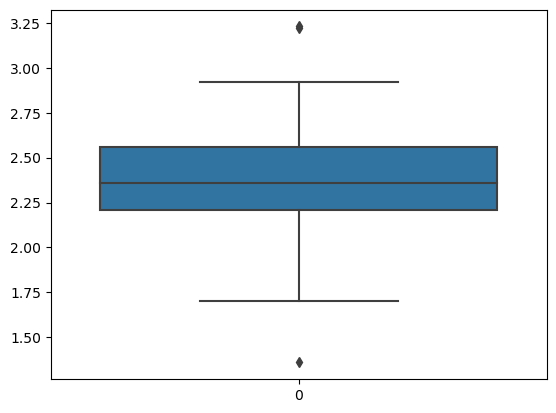

In [58]:
# Línea de código añadida para comprobar que la transformación no afectó realmente la detección de outliers
sns.boxplot(x_wine.ash)

Para fines preliminares se eliminarán los datos que están fuera de rango, pero esto puede ocasionar una pérdida de información significativa dado que la muestra es pequeña. Posteriormente se podría ejecutar una técnica de sobre muestreo para incrementar la visibilidad de la distribución de los datos en caso de que la pérdida supere el 5%.

In [59]:
def remove_outliers(df, threshold=1.5):
    """
    Remove outliers from a DataFrame based on the boxplot criteria.

    Parameters:
    - df: pandas DataFrame
    - threshold: float, optional (default=1.5)
        The threshold to determine outliers. Adjust as needed.

    Returns:
    - df_no_outliers: pandas DataFrame
        DataFrame without outliers in any column.
    - df_outliers: pandas DataFrame
        DataFrame containing only the outliers for each column.
    """
    df_outliers = pd.DataFrame()

    for col in df.columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds to identify outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify outliers and create a DataFrame with them
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        df_outliers = pd.concat([df_outliers, outliers])

    # Remove duplicate rows from df_outliers
    df_outliers = df_outliers.drop_duplicates()

    # Create DataFrame without outliers
    df_no_outliers = df[~df.index.isin(df_outliers.index)]

    return df_no_outliers, df_outliers

In [60]:
data_sin_outliers, outliers = remove_outliers(x_wine)

dso_rows, dso_cols = data_sin_outliers.shape
odf_rows, odf_cols = outliers.shape

print(f'las observaciones dentro del rango son: {dso_rows}')
print(f'Las observaciones fuera de rango son: {odf_rows}')
conserved_data_percentaje = (161/178) * 100
lost_data_percentaje = (17/178) * 100

print(f'La cantidad de datos conservados son: {conserved_data_percentaje}')
print(f'La cantidad de datos perdidos son: {lost_data_percentaje}')


las observaciones dentro del rango son: 161
Las observaciones fuera de rango son: 17
La cantidad de datos conservados son: 90.4494382022472
La cantidad de datos perdidos son: 9.550561797752808


Hay un gran porcentaje de datos perdidos, pero podrían ser menos con técnica de sobre muestreo. Se imprimirán diagramas de caja para confirmar que la mayoría de datos están dentro de rango.

<AxesSubplot:>

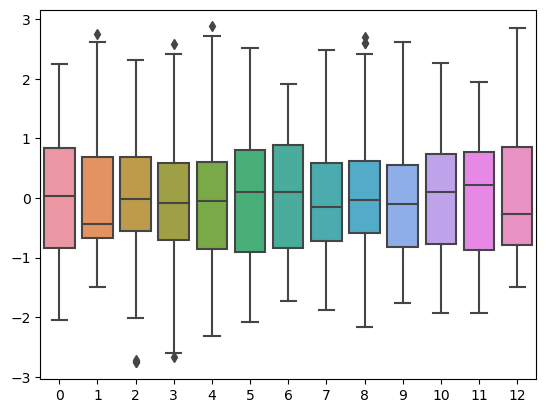

In [61]:
sns.boxplot(data=scaler.fit_transform(data_sin_outliers))

Se implementará una técnica SMOTE para sobremuestreo y agrandar la muestra. Se crearán dos submuestras, una que sólo busque balancear las clases y otra que obtenga el doble de la muestra original, con el fin de verificar cuál muestra presenta mejor rendimiento respecto al análisis.

In [62]:
smote = SMOTE(random_state=5)
X_wine_resampled, y_wine_resampled = smote.fit_resample(x_wine, y_wine)

In [63]:
y_wine_resampled.value_counts()

1    71
2    71
3    71
Name: wine_class, dtype: int64

In [64]:
t_statistic, p_value = ttest_ind(x_wine, X_wine_resampled)

print(p_value)



[0.67790872 0.5032705  0.97438875 0.87341667 0.83106884 0.47185412
 0.42141148 0.73919293 0.52473452 0.22771093 0.2600744  0.34102945
 0.77736991]


In [65]:
t_statistic, p_value = ttest_ind(y_wine, y_wine_resampled)

print(p_value)

0.4467331343897417


Al ejecutar la prueba de hipótesis se rechaza la hipótesis nula de que los datos no provienen de la muestra original, ya que el P value es mayor a 0.05 y por lo tanto es muy probable que la sobre muestra y la muestra original vengan de la misma población, por lo que se asume que el sobre muestreo no ha ingresado sesgo significativo en ninguna feature ni en la variable objetivo.

<AxesSubplot:>

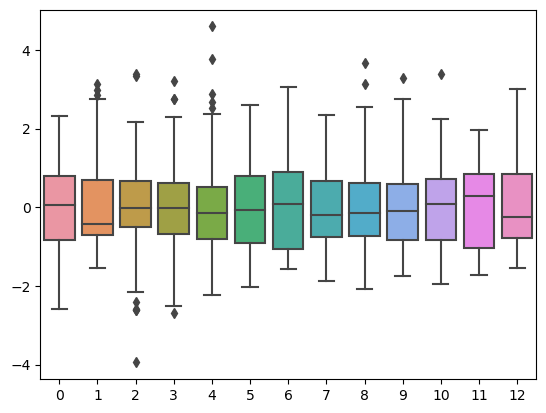

In [66]:
sns.boxplot(data=scaler.fit_transform(X_wine_resampled))

Para encontrar las variables que mejor expliquen la varianza se ejecutará un PCA sobre los datos sin outliers. Cabe destacar que los datos deben estar normalizados para evitar que los rangos grandes de valores dominen todo el espacio vectorial del PCA y sea un análisis más fiable.

In [67]:

n_components = len(data_sin_outliers.columns)
# Realizar PCA
pca = PCA(n_components=n_components)  # Puedes ajustar el número de componentes según tus necesidades
df_pca = pca.fit_transform(scaler.fit_transform(data_sin_outliers))

# Crear un DataFrame con los resultados del PCA
df_pca_result = pd.DataFrame(data=df_pca, columns=[f'PC{x}' for x in range(n_components) ])



In [68]:
df_loadings = pd.DataFrame(pca.components_, columns=data_sin_outliers.columns)

# Mostrar las variables que mejor explican la varianza (por ejemplo, en la primera componente principal)
top_variables = df_loadings.iloc[0].abs().sort_values(ascending=False).index
print("Variables que mejor explican la varianza:")
print(top_variables)

Variables que mejor explican la varianza:
Index(['flavanoids', 'total_phenols', 'OD280_OD315', 'proanthocyanins',
       'proline', 'nonflavanoids_phenols', 'hue', 'ash_alcalinity',
       'malic_acid', 'alcohol', 'magnesium', 'color_intensity', 'ash'],
      dtype='object')


Sería recomendable repetir este análisis excluyendo primero los flavanoles y luego el total de fenoles, debido a que son variables altamente correlacionadas podrían cambiar los resultados del análisis. Se hará una gráfica para la varianza explicada acumulada y determinar el número ideal de componentes para los datos.

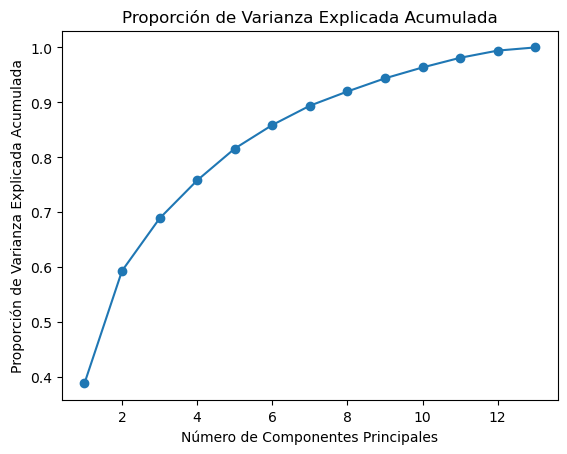

In [69]:
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Graficar la proporción de varianza explicada acumulada
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
plt.title('Proporción de Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.show()

In [70]:
# Calcular la matriz de covarianza
covariance_matrix = np.cov(data_sin_outliers, rowvar=False)

# Calcular eigenvectores y eigenvalores
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Ordenar los eigenvectores y eigenvalores en orden descendente
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Mostrar los eigenvectores y eigenvalores
print("Eigenvalores:")
print(eigenvalues)
print("\nEigenvectores:")
print(eigenvectors)

Eigenvalores:
[1.04923867e+05 1.22413652e+02 7.40641499e+00 3.98678593e+00
 9.69590408e-01 7.26611907e-01 2.56734888e-01 1.20887048e-01
 1.05412526e-01 5.42474957e-02 3.27416764e-02 1.85454040e-02
 7.92035749e-03]

Eigenvectores:
[[ 1.62922553e-03 -1.00305315e-02  9.06924693e-03  1.30316294e-01
   6.58417446e-02 -2.32569102e-01  9.49501073e-01  1.29090477e-01
  -4.88012494e-02  5.52243223e-02  1.34569934e-02 -2.40054551e-02
  -1.82877001e-03]
 [-5.96668515e-04 -1.14575498e-02  1.43991536e-01  1.93929605e-01
  -5.69846651e-01 -7.59580715e-01 -1.66972480e-01  1.91130921e-03
   6.35800042e-02 -5.74794011e-02  1.98804114e-02  6.42095252e-02
  -9.49687817e-03]
 [ 2.00987371e-04 -7.27496621e-03  4.14448823e-02 -1.94303235e-02
   5.63806518e-03 -3.90191942e-02  9.51570418e-04  8.10180982e-03
   8.17428709e-02  4.30138789e-02 -9.62595525e-01 -2.08832901e-01
  -1.32278394e-01]
 [-4.58535471e-03 -1.13232198e-02  9.28564774e-01 -3.40530184e-01
   1.35931323e-01 -1.50040835e-02  2.49715455e-02  1.

In [71]:
# Número de muestras bootstrapped a generar
num_bootstrap_samples = 100

# Almacena las proporciones de varianza explicada para cada bootstrap
explained_variance_ratios = []

for _ in range(num_bootstrap_samples):
    # Muestra bootstrapped
    bootstrap_sample = data_sin_outliers.sample(frac=1, replace=True, random_state=None)

    # Realiza PCA en la muestra bootstrapped
    pca = PCA(n_components=len(data_sin_outliers.columns))
    pca.fit(bootstrap_sample)

    # Almacena la proporción de varianza explicada
    explained_variance_ratios.append(pca.explained_variance_ratio_)

# Calcula la media y desviación estándar de las proporciones de varianza explicada
mean_explained_variance_ratio = np.mean(explained_variance_ratios, axis=0)
std_explained_variance_ratio = np.std(explained_variance_ratios, axis=0)

# Muestra los resultados
print("Proporción de Varianza Explicada (Media):")
print(mean_explained_variance_ratio)
print("\nDesviación Estándar de la Proporción de Varianza Explicada:")
print(std_explained_variance_ratio)

Proporción de Varianza Explicada (Media):
[9.98704413e-01 1.16326214e-03 7.28451112e-05 3.78502274e-05
 9.40052681e-06 6.77713968e-06 2.36186531e-06 1.13862420e-06
 9.17223533e-07 5.07629047e-07 2.95562147e-07 1.63066236e-07
 6.76948640e-08]

Desviación Estándar de la Proporción de Varianza Explicada:
[2.03990675e-04 1.94048232e-04 1.15289430e-05 5.95424805e-06
 1.45330543e-06 1.08472193e-06 3.49906668e-07 1.55771993e-07
 1.31467580e-07 8.16467043e-08 4.47904005e-08 2.31044019e-08
 1.18228496e-08]
